<a href="https://colab.research.google.com/github/HClO-LUO/Pyhton-demo/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import IPython
from google.colab import output

display(IPython.display.Javascript('''
 function ClickConnect(){
   btn = document.querySelector("colab-connect-button")
   if (btn != null){
     console.log("Click colab-connect-button"); 
     btn.click() 
     }
   
   btn = document.getElementById('ok')
   if (btn != null){
     console.log("Click reconnect"); 
     btn.click() 
     }
  }
  
setInterval(ClickConnect,60000)
'''))

print("Done.")

<IPython.core.display.Javascript object>

Done.


In [ ]:
! git clone https://github.com/sunyingjian/numpy-.git

Cloning into 'numpy-'...
remote: Enumerating objects: 446, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 446 (delta 18), reused 0 (delta 0), pack-reused 403
Receiving objects: 100% (446/446), 202.67 MiB | 27.30 MiB/s, done.
Resolving deltas: 100% (132/132), done.
Updating files: 100% (216/216), done.


In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
path = "/content/numpy-/3345train data.csv"

Mounted at /content/drive


In [ ]:
! git clone https://github.com/sunyingjian/Machine-Learning-From-Scratch.git

Cloning into 'Machine-Learning-From-Scratch'...
remote: Enumerating objects: 287, done.
remote: Total 287 (delta 0), reused 0 (delta 0), pack-reused 287
Receiving objects: 100% (287/287), 91.40 KiB | 1.90 MiB/s, done.
Resolving deltas: 100% (133/133), done.


In [5]:
%matplotlib inline
#%matplotlib inline 可以在Ipython编译器里直接使用，功能是可以内嵌绘图，并且可以省略掉plt.show()这一步。
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option
set_option("display.max_rows", 10)#设置要显示的默认行数，显示的最大行数是10
pd.options.mode.chained_assignment = None #为了在增加列表行数的时候防止出现setting with copy warning
filename = 'facies_vectors.csv'
training_data = pd.read_csv('/content/numpy-/3345train data.csv')
training_data
testing_data = pd.read_csv('/content/numpy-/3345test_data.csv')
testing_data

,AC,CAL,GR,K,RD,SP,Core Lithology
0,0.038756,0.026970,0.094776,0.112543,0.001420,0.614504,5
1,0.347382,0.090194,0.145150,0.202335,0.002744,0.339568,7
2,0.218400,0.059510,0.252165,0.711295,0.003874,0.918567,3
3,0.366064,0.082147,0.149304,0.201731,0.003290,0.343180,7
4,0.291877,0.079981,0.141782,0.289309,0.003455,0.344605,7
...,...,...,...,...,...,...,...
361,0.016947,0.138827,0.118400,0.358567,0.281687,0.302936,6
362,0.131043,0.069016,0.029354,0.060197,0.282093,0.253809,3
363,0.036182,0.032010,0.030090,0.071069,0.359737,0.435486,5
364,0.014562,0.127332,0.035014,0.178579,0.803566,0.311641,6


In [6]:
# 1=粗砂岩  2=中砂岩   3=细砂岩
# 4=粉砂岩 5=白云岩 6=石灰岩 7=泥岩
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1']

facies_labels = ['CS', 'MS', 'FS', 'SS', 'DM',
                 'LS', 'MDS']
#facies_color_map is a dictionary that maps facies labels
#to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]
training_data.describe()

,AC,CAL,GR,K,RD,SP,Core Lithology
count,3.345000e+03,3.345000e+03,3.345000e+03,3.345000e+03,3.345000e+03,3345.000000,3345.000000
mean,2.107992e-01,1.450162e-01,1.662901e-01,3.464980e-01,4.917120e-02,0.418110,4.221525
std,1.099814e-01,1.353280e-01,1.036918e-01,1.808527e-01,8.719010e-02,0.196548,2.079667
min,1.000000e-07,1.000000e-08,1.000000e-07,1.000000e-07,1.000000e-09,-0.062739,1.000000
25%,1.594008e-01,5.225926e-02,8.778840e-02,2.079726e-01,1.270254e-02,0.325241,2.000000
50%,2.124234e-01,9.779821e-02,1.520483e-01,3.352124e-01,2.403313e-02,0.384527,4.000000
75%,2.574892e-01,1.850738e-01,2.359244e-01,4.811758e-01,4.815465e-02,0.439047,7.000000
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,7.000000


In [7]:
# 1=粗砂岩  2=中砂岩   3=细砂岩
# 4=粉砂岩 5=白云岩 6=石灰岩 7=泥岩
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1']

facies_labels = ['CS', 'MS', 'FS', 'SS', 'DM',
                 'LS', 'MDS']
#facies_color_map is a dictionary that maps facies labels
#to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]
testing_data.describe()

,AC,CAL,GR,K,RD,SP,Core Lithology
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,0.214074,0.148747,0.147995,0.330942,0.046567,0.389129,4.215847
std,0.108781,0.144160,0.087543,0.181384,0.080542,0.196271,2.072619
min,0.003611,0.007118,0.005029,0.025971,0.001420,-0.061365,1.000000
25%,0.162638,0.052989,0.079442,0.194786,0.012828,0.317109,2.000000
50%,0.215371,0.098682,0.132807,0.302396,0.022275,0.379000,4.000000
75%,0.269240,0.179492,0.217013,0.456563,0.047410,0.435390,7.000000
max,0.713160,0.994694,0.483319,0.994363,0.891134,0.997070,7.000000


CS     194
MS     710
FS     751
SS     166
DM     482
LS     114
MDS    928
Name: Core Lithology, dtype: int64

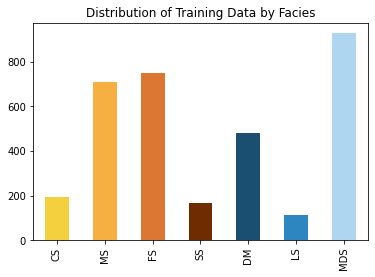

In [8]:
#count the number of unique entries for each facies, sort them by facies number (instead of by number of entries)
#计算每个相的唯一条目数，然后按相数（而不是条目数）对它们进行排序
facies_counts = training_data['Core Lithology'].value_counts().sort_index()
#use facies labels to index each count
#使用相标签索引每个计数
facies_counts.index = facies_labels

facies_counts.plot(kind='bar',color=facies_colors, 
                   title='Distribution of Training Data by Facies')
facies_counts